# Import das bibliotecas necesárias

In [9]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as plt

# Exploração dos dados

## Leitura dos dados da planilha


### Transplantes_Falecido

In [36]:
# Reading spread-sheet

header_row = 4

df = pd.read_excel(
    "Base de Dados_Doação e Transplantes_2022_2023_SNT_Vs_14_04_2023.xlsx",
    sheet_name=0,
    header=header_row,
)
df.head()

,Ano do Transplante,Mês do Transplante,Enxerto,UF,Região,Data do Transplante,Tipo Doador,UF origem,ID,Equipe,Estabelecimento,Cidade Estabelecimento
0,2022,Janeiro,RI,BA,Nordeste,2022-01-01,Falecido,BA,259927BA,BA - ANA NERY - Ricardo José Costa Mattoso,HOSPITAL ANA NERY,SALVADOR
1,2022,Janeiro,RI,SC,Sul,2022-01-01,Falecido,SC,281883SC,SC - HSI - Denise Rodrigues Pedroso,HOSPITAL SANTA ISABEL,BLUMENAU
2,2022,Janeiro,RI,RJ,Sudeste,2022-01-01,Falecido,RJ,234883RJ,RJ - HSL - Pedro Túlio Rocha,IMPAR SERVIÇOS HOSPITALARES - SÃO LUCAS,RIO DE JANEIRO
3,2022,Janeiro,RI,RJ,Sudeste,2022-01-01,Falecido,RJ,263012RJ,RJ - HSFA - Deise Rosa de Boni Monteiro de Ca...,SES-HOSPITAL SÃO FRANCISCO DE ASSIS,RIO DE JANEIRO
4,2022,Janeiro,RI,BA,Nordeste,2022-01-01,Falecido,BA,261109BA,BA - ANA NERY - Ricardo José Costa Mattoso,HOSPITAL ANA NERY,SALVADOR


In [25]:
# Formatting column names

from unidecode import unidecode

formated_columns = [unidecode(col_name.strip().replace(' ', '_')) for col_name in df.columns]

df.columns = formated_columns
df.head()

,Ano_do_Transplante,Mes_do_Transplante,Enxerto,UF,Regiao,Data_do_Transplante,Tipo_Doador,UF_origem,ID,Equipe,Estabelecimento,Cidade_Estabelecimento
0,2022,Janeiro,RI,BA,Nordeste,2022-01-01,Falecido,BA,259927BA,BA - ANA NERY - Ricardo José Costa Mattoso,HOSPITAL ANA NERY,SALVADOR
1,2022,Janeiro,RI,SC,Sul,2022-01-01,Falecido,SC,281883SC,SC - HSI - Denise Rodrigues Pedroso,HOSPITAL SANTA ISABEL,BLUMENAU
2,2022,Janeiro,RI,RJ,Sudeste,2022-01-01,Falecido,RJ,234883RJ,RJ - HSL - Pedro Túlio Rocha,IMPAR SERVIÇOS HOSPITALARES - SÃO LUCAS,RIO DE JANEIRO
3,2022,Janeiro,RI,RJ,Sudeste,2022-01-01,Falecido,RJ,263012RJ,RJ - HSFA - Deise Rosa de Boni Monteiro de Ca...,SES-HOSPITAL SÃO FRANCISCO DE ASSIS,RIO DE JANEIRO
4,2022,Janeiro,RI,BA,Nordeste,2022-01-01,Falecido,BA,261109BA,BA - ANA NERY - Ricardo José Costa Mattoso,HOSPITAL ANA NERY,SALVADOR


In [33]:
# Specifying columns data types

df.Ano_do_Transplante.astype('int')

0        2022
1        2022
2        2022
3        2022
4        2022
         ... 
26610    2023
26611    2023
26612    2023
26613    2023
26614    2023
Name: Ano_do_Transplante, Length: 26615, dtype: int64

In [57]:
np.unique(df.Equipe)

array([' Leforte - Tércio Genzini',
       'A.C.Camargo - Eduardo Antunes da Fonseca',
       'Albert Einstein - Alvaro Pacheco e Silva Filho (Rim)',
       'B.Portuguesa - Anita Leme da Rocha Saldanha (Rim)',
       'B.Portuguesa - Irene Noronha (Rim)',
       'B.Portuguesa - João Egídio Romão Junior',
       'BA - ANA NERY - Claudia Andrade Nunes',
       'BA - ANA NERY - Ricardo José Costa Mattoso',
       'BA - CPB - Carolina Lara Neves',
       'BA - HDPA - Rodrigo Serapião Mendes',
       'BA - HDPA - Tulio Coelho de Carvalho',
       'BA - HEMEC - Victor Pereira Paschoalin',
       'BA - HMG - Leonardo Fernandes Canedo',
       'BA - HPORT - Maria Fernanda Ramos Coelho Alves',
       'BA - HSR - Ana Paula Maia Baptista',
       'BP-Mirante/S José - Irene Noronha',
       'BP-Mirante/S. José - André Ibrahim David',
       'Botucatu - H.C.F.M-UNESP', 'CE - HAP - Jansen de Sousa Gomes',
       "CE - HCD'ARS - Ronaldo de M. Esmeraldo",
       'CE - HGF - Ronaldo de Matos Esmeraldo',

array([[<Axes: title={'center': 'Ano_do_Transplante'}>,
        <Axes: title={'center': 'Data_do_Transplante'}>]], dtype=object)

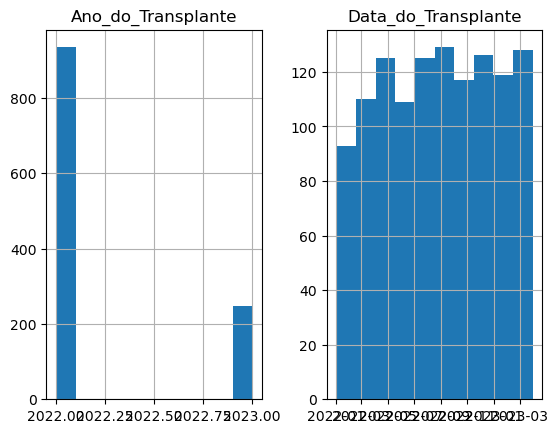

In [56]:
df.hist()

### Doação

In [38]:
# Reading spread-sheet

header_row = 5

df = pd.read_excel(
    "Base de Dados_Doação e Transplantes_2022_2023_SNT_Vs_14_04_2023.xlsx",
    sheet_name=1,
    header=header_row,
)
df.head()

,UF,Região,Ano da Notificação,Mês da Notificação,Data da Notificação,Doador de MO,ID,Hospital Notificante,Cidade Estabelecimento
0,CE,Nordeste,2022,Janeiro,2022-01-01,Viável,359717CE,IJF INSTITUTO DR JOSE FROTA CENTRAL,FORTALEZA
1,DF,Centro Oeste,2022,Janeiro,2022-01-01,Não Viável,359718DF,HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,BRASILIA
2,GO,Centro Oeste,2022,Janeiro,2022-01-01,Não Viável,359722GO,HOSPITAL MATERNO INFANTIL HMI,GOIANIA
3,GO,Centro Oeste,2022,Janeiro,2022-01-01,Viável,359727GO,HOSPITAL DE URGENCIAS DE GOIANIA HUGO,GOIANIA
4,PI,Nordeste,2022,Janeiro,2022-01-01,Não Viável,359719PI,HOSPITAL DE URGÊNCIA DE TERESINA - HUT,TERESINA


In [39]:
# Formatting column names

from unidecode import unidecode

formated_columns = [unidecode(col_name.strip().replace(' ', '_')) for col_name in df.columns]

df.columns = formated_columns
df.head()

,UF,Regiao,Ano_da_Notificacao,Mes_da_Notificacao,Data_da_Notificacao,Doador_de_MO,ID,Hospital_Notificante,Cidade_Estabelecimento
0,CE,Nordeste,2022,Janeiro,2022-01-01,Viável,359717CE,IJF INSTITUTO DR JOSE FROTA CENTRAL,FORTALEZA
1,DF,Centro Oeste,2022,Janeiro,2022-01-01,Não Viável,359718DF,HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,BRASILIA
2,GO,Centro Oeste,2022,Janeiro,2022-01-01,Não Viável,359722GO,HOSPITAL MATERNO INFANTIL HMI,GOIANIA
3,GO,Centro Oeste,2022,Janeiro,2022-01-01,Viável,359727GO,HOSPITAL DE URGENCIAS DE GOIANIA HUGO,GOIANIA
4,PI,Nordeste,2022,Janeiro,2022-01-01,Não Viável,359719PI,HOSPITAL DE URGÊNCIA DE TERESINA - HUT,TERESINA


### Inscrição

In [41]:
# Reading spread-sheet

header_row = 4

df = pd.read_excel(
    "Base de Dados_Doação e Transplantes_2022_2023_SNT_Vs_14_04_2023.xlsx",
    sheet_name=2,
    header=header_row,
)
df.head()

,UF,Região,ID,Ano,Mês,Data da Inscrição,Enxerto,UF origem,Equipe,Estabelecimento,Cidade Estabelecimento
0,ES,Sudeste,288761ES,2022,Janeiro,2022-01-02,CA,ES,ES - HC - Kahlil Ruas Ribeiro Mendes,HOSPITAL DAS CLINICAS,VITORIA
1,ES,Sudeste,288760ES,2022,Janeiro,2022-01-02,CA,BA,ES - HC - Kahlil Ruas Ribeiro Mendes,HOSPITAL DAS CLINICAS,VITORIA
2,PB,Nordeste,288762PB,2022,Janeiro,2022-01-02,FI,PE,PB - HNSN - Cláudio Moura Lacerda de Melo,HOSPITAL NOSSA SENHORA DAS NEVES LTDA,JOAO PESSOA
3,SP,Sudeste,288414SP,2022,Janeiro,2022-01-02,CA,RJ,Hospital Mario Covas - Luiz Antônio de Brito M...,Hospital Estadual Mario Covas,Santo André
4,SP,Sudeste,288415SP,2022,Janeiro,2022-01-02,CA,SP,Hospital Mario Covas - Luiz Antônio de Brito M...,Hospital Estadual Mario Covas,Santo André


In [42]:
# Formatting column names

from unidecode import unidecode

formated_columns = [unidecode(col_name.strip().replace(' ', '_')) for col_name in df.columns]

df.columns = formated_columns
df.head()

,UF,Regiao,ID,Ano,Mes,Data_da_Inscricao,Enxerto,UF_origem,Equipe,Estabelecimento,Cidade_Estabelecimento
0,ES,Sudeste,288761ES,2022,Janeiro,2022-01-02,CA,ES,ES - HC - Kahlil Ruas Ribeiro Mendes,HOSPITAL DAS CLINICAS,VITORIA
1,ES,Sudeste,288760ES,2022,Janeiro,2022-01-02,CA,BA,ES - HC - Kahlil Ruas Ribeiro Mendes,HOSPITAL DAS CLINICAS,VITORIA
2,PB,Nordeste,288762PB,2022,Janeiro,2022-01-02,FI,PE,PB - HNSN - Cláudio Moura Lacerda de Melo,HOSPITAL NOSSA SENHORA DAS NEVES LTDA,JOAO PESSOA
3,SP,Sudeste,288414SP,2022,Janeiro,2022-01-02,CA,RJ,Hospital Mario Covas - Luiz Antônio de Brito M...,Hospital Estadual Mario Covas,Santo André
4,SP,Sudeste,288415SP,2022,Janeiro,2022-01-02,CA,SP,Hospital Mario Covas - Luiz Antônio de Brito M...,Hospital Estadual Mario Covas,Santo André


### Óbitos em Lista

In [50]:
# Reading spread-sheet

header_row = 5

df = pd.read_excel(
    "Base de Dados_Doação e Transplantes_2022_2023_SNT_Vs_14_04_2023.xlsx",
    sheet_name=3,
    header=header_row,
)
df.head()

,UF,Região,ID,Ano,Mês,Data do Óbito,Enxerto,Equipe,Estabelecimento,Cidade Estabelecimento,Evento,Coluna1,Coluna2
0,PE,Nordeste,233143PE,2022,Janeiro,2022-01-01,RI,PE - RHP - Frederico Castelo Branco Cavalcante,REAL HOSPITAL PORTUGUES DE BENEFICÊNCIA,RECIFE,Óbito Pré Transplantes,Soro vencido,44712.0
1,PI,Nordeste,261669PI,2022,Janeiro,2022-01-01,RI,PI - HGV - Celina Teresa C. Branco. C. Sousa,HOSPITAL GETULIO VARGAS,TERESINA,Óbito Pré Transplantes,Sem Painel,44484.0
2,PR,Sul,286169PR,2022,Janeiro,2022-01-01,FI,PR - HMSR - André Gustavo Santos Pereira,HOSPITAL E MATERNIDADE SANTA RITA,MARINGA,Óbito Pré Transplantes,Removido sem condições clínicas,44564.0
3,BA,Nordeste,288281BA,2022,Janeiro,2022-01-01,FI,BA - HP- Bruno da Silveira Almeida,HOSPITAL PORTUGUES,SALVADOR,Óbito Pré Transplantes,MELD/PELD vencido,44552.0
4,SP,Sudeste,251140SP,2022,Janeiro,2022-01-01,CO_RI,HC - Coração adulto,Hospital das Clínicas de São Paulo,São Paulo,Óbito Pré Transplantes,NaN,NaN


In [51]:
# Formatting column names

from unidecode import unidecode

formated_columns = [unidecode(col_name.strip().replace(' ', '_')) for col_name in df.columns]

df.columns = formated_columns
df.head()

,UF,Regiao,ID,Ano,Mes,Data_do_Obito,Enxerto,Equipe,Estabelecimento,Cidade_Estabelecimento,Evento,Coluna1,Coluna2
0,PE,Nordeste,233143PE,2022,Janeiro,2022-01-01,RI,PE - RHP - Frederico Castelo Branco Cavalcante,REAL HOSPITAL PORTUGUES DE BENEFICÊNCIA,RECIFE,Óbito Pré Transplantes,Soro vencido,44712.0
1,PI,Nordeste,261669PI,2022,Janeiro,2022-01-01,RI,PI - HGV - Celina Teresa C. Branco. C. Sousa,HOSPITAL GETULIO VARGAS,TERESINA,Óbito Pré Transplantes,Sem Painel,44484.0
2,PR,Sul,286169PR,2022,Janeiro,2022-01-01,FI,PR - HMSR - André Gustavo Santos Pereira,HOSPITAL E MATERNIDADE SANTA RITA,MARINGA,Óbito Pré Transplantes,Removido sem condições clínicas,44564.0
3,BA,Nordeste,288281BA,2022,Janeiro,2022-01-01,FI,BA - HP- Bruno da Silveira Almeida,HOSPITAL PORTUGUES,SALVADOR,Óbito Pré Transplantes,MELD/PELD vencido,44552.0
4,SP,Sudeste,251140SP,2022,Janeiro,2022-01-01,CO_RI,HC - Coração adulto,Hospital das Clínicas de São Paulo,São Paulo,Óbito Pré Transplantes,NaN,NaN


### Origem dos Órgãos Transplantado

In [52]:
# Reading spread-sheet

header_row = 5

df = pd.read_excel(
    "Base de Dados_Doação e Transplantes_2022_2023_SNT_Vs_14_04_2023.xlsx",
    sheet_name=4,
    header=header_row,
)
df.head()

,ID Doador,UF Notificação,Região,Hospital Notificante,Cidade Hospital,OPO Notificante,Data da Notificação,Enxerto,Lateralidade,UF Destino,Região Destino,Data do Transplante,ID Receptor,Equipe de Transplante,Centro Transplantador,Cidade Centro Tx
0,359364SC,SC,Sul,ASSOCIAÇÃO HOSPITALAR SÃO JOSÉ - JARAGUÁ DO SUL,JARAGUA DO SUL,OPO SANTA CATARINA,2021-12-25,RI,D,SC,Sul,2022-01-01,281883SC,SC - HSI - Denise Rodrigues Pedroso,HOSPITAL SANTA ISABEL,BLUMENAU
1,359661RJ,RJ,Sudeste,Hospital Estadual Alberto Torres,SAO GONCALO,OPO RIO DE JANEIRO,2021-12-30,RI,D,RJ,Sudeste,2022-01-01,234883RJ,RJ - HSL - Pedro Túlio Rocha,IMPAR SERVIÇOS HOSPITALARES - SÃO LUCAS,RIO DE JANEIRO
2,359364SC,SC,Sul,ASSOCIAÇÃO HOSPITALAR SÃO JOSÉ - JARAGUÁ DO SUL,JARAGUA DO SUL,OPO SANTA CATARINA,2021-12-25,RI,E,SC,Sul,2022-01-01,282526SC,SC - HSI - Denise Rodrigues Pedroso,HOSPITAL SANTA ISABEL,BLUMENAU
3,359689BA,BA,Nordeste,HOSPITAL ESTADUAL DA CRIANÇA,FEIRA DE SANTANA,OPO BAHIA,2021-12-31,RI,E,BA,Nordeste,2022-01-01,261109BA,BA - ANA NERY - Ricardo José Costa Mattoso,HOSPITAL ANA NERY,SALVADOR
4,359661RJ,RJ,Sudeste,Hospital Estadual Alberto Torres,SAO GONCALO,OPO RIO DE JANEIRO,2021-12-30,RI,E,RJ,Sudeste,2022-01-01,263012RJ,RJ - HSFA - Deise Rosa de Boni Monteiro de Ca...,SES-HOSPITAL SÃO FRANCISCO DE ASSIS,RIO DE JANEIRO


In [53]:
# Formatting column names

from unidecode import unidecode

formated_columns = [unidecode(col_name.strip().replace(' ', '_')) for col_name in df.columns]

df.columns = formated_columns
df.head()

,ID_Doador,UF_Notificacao,Regiao,Hospital_Notificante,Cidade_Hospital,OPO_Notificante,Data_da_Notificacao,Enxerto,Lateralidade,UF_Destino,Regiao_Destino,Data_do_Transplante,ID_Receptor,Equipe_de_Transplante,Centro_Transplantador,Cidade_Centro_Tx
0,359364SC,SC,Sul,ASSOCIAÇÃO HOSPITALAR SÃO JOSÉ - JARAGUÁ DO SUL,JARAGUA DO SUL,OPO SANTA CATARINA,2021-12-25,RI,D,SC,Sul,2022-01-01,281883SC,SC - HSI - Denise Rodrigues Pedroso,HOSPITAL SANTA ISABEL,BLUMENAU
1,359661RJ,RJ,Sudeste,Hospital Estadual Alberto Torres,SAO GONCALO,OPO RIO DE JANEIRO,2021-12-30,RI,D,RJ,Sudeste,2022-01-01,234883RJ,RJ - HSL - Pedro Túlio Rocha,IMPAR SERVIÇOS HOSPITALARES - SÃO LUCAS,RIO DE JANEIRO
2,359364SC,SC,Sul,ASSOCIAÇÃO HOSPITALAR SÃO JOSÉ - JARAGUÁ DO SUL,JARAGUA DO SUL,OPO SANTA CATARINA,2021-12-25,RI,E,SC,Sul,2022-01-01,282526SC,SC - HSI - Denise Rodrigues Pedroso,HOSPITAL SANTA ISABEL,BLUMENAU
3,359689BA,BA,Nordeste,HOSPITAL ESTADUAL DA CRIANÇA,FEIRA DE SANTANA,OPO BAHIA,2021-12-31,RI,E,BA,Nordeste,2022-01-01,261109BA,BA - ANA NERY - Ricardo José Costa Mattoso,HOSPITAL ANA NERY,SALVADOR
4,359661RJ,RJ,Sudeste,Hospital Estadual Alberto Torres,SAO GONCALO,OPO RIO DE JANEIRO,2021-12-30,RI,E,RJ,Sudeste,2022-01-01,263012RJ,RJ - HSFA - Deise Rosa de Boni Monteiro de Ca...,SES-HOSPITAL SÃO FRANCISCO DE ASSIS,RIO DE JANEIRO


### Transplantes_Intervivos

In [54]:
# Reading spread-sheet

header_row = 5

df = pd.read_excel(
    "Base de Dados_Doação e Transplantes_2022_2023_SNT_Vs_14_04_2023.xlsx",
    sheet_name=5,
    header=header_row,
)
df.head()

,UF,Região,ID,Ano do Transplante,Mês do Transplante,Data do Transplante,Enxerto,UF origem,Equipe,Estabelecimento,Cidade Estabelecimento,Tipo Doador,Status do Transplante
0,PR,Sul,285402PR,2022,Janeiro,2022-01-03,FI,NaN,PR - HIPP - José Sampaio Neto,HOSPITAL INFANTIL PEQUENO PRÍNCIPE,CURITIBA,Vivo,Confirmado
1,SP,Sudeste,288405SP,2022,Janeiro,2022-01-03,FI,SP,HC - Fígado infantil,Hospital das Clínicas de São Paulo,São Paulo,Vivo,Confirmado
2,SP,Sudeste,284244SP,2022,Janeiro,2022-01-03,FI,PI,HC - Fígado infantil,Hospital das Clínicas de São Paulo,São Paulo,Vivo,Confirmado
3,SP,Sudeste,257282SP,2022,Janeiro,2022-01-03,RI,SP,Leforte - Paulo Sérgio Luconi,Hospital Leforte Liberdade,São Paulo,Vivo,Confirmado
4,SP,Sudeste,286655SP,2022,Janeiro,2022-01-03,RI,SP,Oswaldo Cruz-Mario Nogueira Junior,Hospital Alemão Oswaldo Cruz,São Paulo,Vivo,Confirmado


In [55]:
# Formatting column names

from unidecode import unidecode

formated_columns = [unidecode(col_name.strip().replace(' ', '_')) for col_name in df.columns]

df.columns = formated_columns
df.head()

,UF,Regiao,ID,Ano_do_Transplante,Mes_do_Transplante,Data_do_Transplante,Enxerto,UF_origem,Equipe,Estabelecimento,Cidade_Estabelecimento,Tipo_Doador,Status_do_Transplante
0,PR,Sul,285402PR,2022,Janeiro,2022-01-03,FI,NaN,PR - HIPP - José Sampaio Neto,HOSPITAL INFANTIL PEQUENO PRÍNCIPE,CURITIBA,Vivo,Confirmado
1,SP,Sudeste,288405SP,2022,Janeiro,2022-01-03,FI,SP,HC - Fígado infantil,Hospital das Clínicas de São Paulo,São Paulo,Vivo,Confirmado
2,SP,Sudeste,284244SP,2022,Janeiro,2022-01-03,FI,PI,HC - Fígado infantil,Hospital das Clínicas de São Paulo,São Paulo,Vivo,Confirmado
3,SP,Sudeste,257282SP,2022,Janeiro,2022-01-03,RI,SP,Leforte - Paulo Sérgio Luconi,Hospital Leforte Liberdade,São Paulo,Vivo,Confirmado
4,SP,Sudeste,286655SP,2022,Janeiro,2022-01-03,RI,SP,Oswaldo Cruz-Mario Nogueira Junior,Hospital Alemão Oswaldo Cruz,São Paulo,Vivo,Confirmado
